In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malicious_phish.csv


Import Required Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Load data

In [3]:
data = pd.read_csv("/kaggle/input/malicious_phish.csv", nrows = 150000)

Data Preprocessing

In [4]:
# Convert types into numeric labels
label_mapping = {"benign": 0, "phishing": 1, "defacement": 2, "malware" : 3}
data['label'] = data['type'].map(label_mapping)

Feature Engineering

In [5]:
# Tokenize URLs into words or characters and compute TF-IDF features
vectorizer = TfidfVectorizer(analyzer='char', lowercase=False)
X = vectorizer.fit_transform(data['url'])

# Split data into features (X) and labels (y)
y = data['label']

Split the Data

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [7]:
X[0]

<1x173 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [8]:
X[1]

<1x173 sparse matrix of type '<class 'numpy.float64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [9]:
# An example of how the vectorizer would transform the give url
url1 = ['https://www.google.com/']
P = vectorizer.fit_transform(url1)
print(P)

  (0, 8)	0.14586499149789456
  (0, 3)	0.14586499149789456
  (0, 4)	0.14586499149789456
  (0, 7)	0.14586499149789456
  (0, 9)	0.4375949744936837
  (0, 5)	0.2917299829957891
  (0, 0)	0.2917299829957891
  (0, 13)	0.4375949744936837
  (0, 1)	0.4375949744936837
  (0, 2)	0.14586499149789456
  (0, 11)	0.14586499149789456
  (0, 10)	0.14586499149789456
  (0, 12)	0.2917299829957891
  (0, 6)	0.14586499149789456


In [10]:
type(P)

scipy.sparse._csr.csr_matrix

In [11]:
print(f"X_train Shape : {X_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {X_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (120000, 173)
Y_train Shape : (120000,)
X_test  Shape : (30000, 173)
Y_test  Shape : (30000,)


Logistic Regression Model

In [12]:
from sklearn.linear_model import LogisticRegression

classifier1 = LogisticRegression(max_iter=1000, random_state=24)
classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[21651    81   179    46]
 [  387  1104   297    11]
 [  271    50  5193    19]
 [  174    73   150   314]]


KNeighborsClassifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

classifier2 = KNeighborsClassifier(metric='euclidean')
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[21487    80   364    26]
 [  944   696   148    11]
 [  148    13  5355    17]
 [   93    26    26   566]]


MultinomialNB

In [16]:
from sklearn.naive_bayes import MultinomialNB

classifier3 = MultinomialNB()
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)

In [17]:
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[[21771     0   116    70]
 [ 1787     1    11     0]
 [ 3112     0  2420     1]
 [  414     0    68   229]]


DecisionTreeClassifier

In [18]:
from sklearn.tree import DecisionTreeClassifier 

classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state=22)
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)

In [19]:
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)

[[21788    29    98    42]
 [   31  1542   149    77]
 [   82   141  5277    33]
 [   27    67    24   593]]


RandomForestClassifier

In [20]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators=100,max_features='sqrt')
classifier5.fit(X_train,y_train)
y_pred5 = classifier5.predict(X_test)

In [21]:
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)

[[21927     0    30     0]
 [   67  1510   222     0]
 [   99     1  5433     0]
 [   58    68    28   557]]


XGBClassifier

In [22]:
from xgboost import XGBClassifier

# Assuming X_train and y_train are DataFrame objects
classifier6 = XGBClassifier(random_state=32)
classifier6.fit(X_train, y_train)
y_pred6 = classifier6.predict(X_test)


In [23]:
cm6 = confusion_matrix(y_test, y_pred6)
print(cm6)

[[21901     7    44     5]
 [   14  1654   122     9]
 [   39    16  5475     3]
 [   36    72    23   580]]


Performance mertics

In [24]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Assuming you have imported the classifiers and defined their predictions
classifiers = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6]
model_names = ['LogisticRegression', 'KNeighborsClassifier', 'MultinomialNB', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier']

# Create a dictionary to map model names to their respective predictions
classifier_map = dict(zip(model_names, classifiers))

# Now you can use this dictionary to iterate over each model name and its predictions
for model_name, y_pred in classifier_map.items():
    accuracy = accuracy_score(y_test, y_pred) 
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1score = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred) 
    
    print(f"\nMetrics for Model '{model_name}':")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1score}")
    print(f"Classification Report:\n{class_report}")



Metrics for Model 'LogisticRegression':
Accuracy: 0.9420666666666667
Precision: 0.93910335586769
Recall: 0.9420666666666667
F1-score: 0.9380305492587265
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     21957
           1       0.84      0.61      0.71      1799
           2       0.89      0.94      0.91      5533
           3       0.81      0.44      0.57       711

    accuracy                           0.94     30000
   macro avg       0.88      0.74      0.79     30000
weighted avg       0.94      0.94      0.94     30000


Metrics for Model 'KNeighborsClassifier':
Accuracy: 0.9368
Precision: 0.9340878406167985
Recall: 0.9368
F1-score: 0.9297244194297466
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     21957
           1       0.85      0.39      0.53      1799
           2       0.91      0.97      0.94      5533
           3  

Results on bar plot

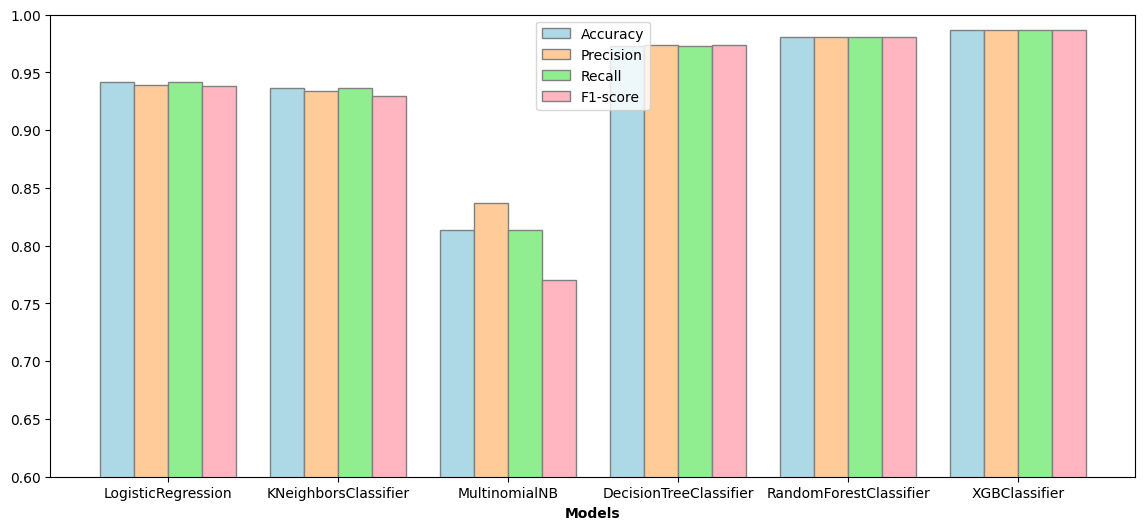

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize data for the bar chart
models = list(classifier_map.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Calculate metric scores for each model
metric_scores = {}
for metric in metrics:
    metric_scores[metric] = [accuracy_score(y_test, classifier_map[model_name]) if metric == 'Accuracy'
                             else precision_score(y_test, classifier_map[model_name], average='weighted') if metric == 'Precision'
                             else recall_score(y_test, classifier_map[model_name], average='weighted') if metric == 'Recall'
                             else f1_score(y_test, classifier_map[model_name], average='weighted') for model_name in models]

# Set width of bars
bar_width = 0.2

# Set position of bars on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(14, 6))

# Define light colors
colors = ['#add8e6', '#ffcc99', '#90ee90', '#ffb6c1']

# Plotting the bars
plt.bar(r1, metric_scores['Accuracy'], color=colors[0], width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, metric_scores['Precision'], color=colors[1], width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, metric_scores['Recall'], color=colors[2], width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, metric_scores['F1-score'], color=colors[3], width=bar_width, edgecolor='grey', label='F1-score')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(models))], models)

# Set y-axis limits
plt.ylim(0.6, 1.0)

# Add a legend and show the plot
plt.legend()
plt.show()


Results on line plot

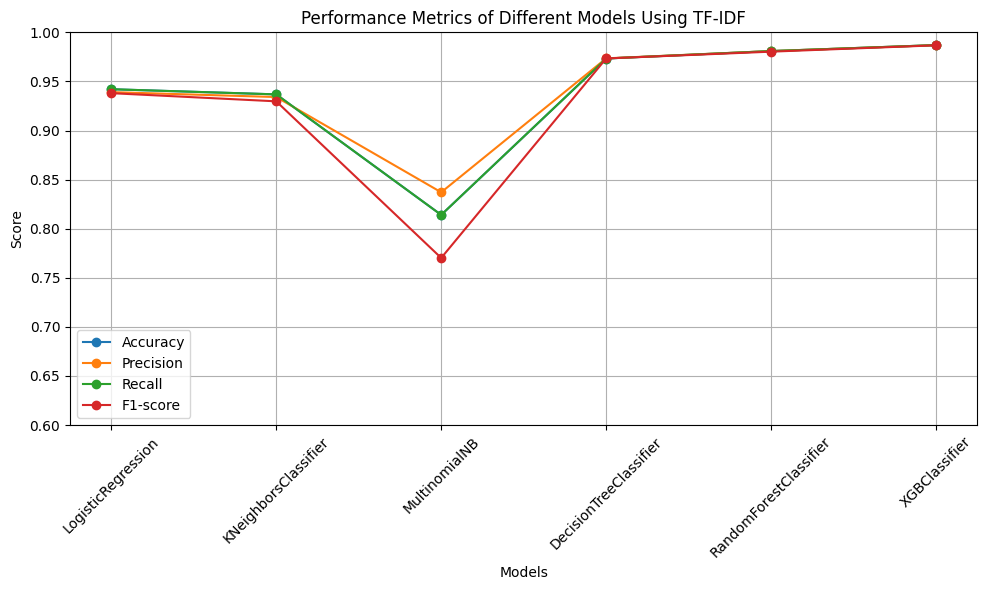

In [26]:
import matplotlib.pyplot as plt

# Initialize data for the line plot
models = list(classifier_map.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Calculate metric scores for each model
metric_scores = {}
for metric in metrics:
    metric_scores[metric] = [accuracy_score(y_test, classifier_map[model_name]) if metric == 'Accuracy'
                             else precision_score(y_test, classifier_map[model_name], average='weighted') if metric == 'Precision'
                             else recall_score(y_test, classifier_map[model_name], average='weighted') if metric == 'Recall'
                             else f1_score(y_test, classifier_map[model_name], average='weighted') for model_name in models]

# Plotting the line plot
plt.figure(figsize=(10, 6))

for metric in metrics:
    plt.plot(models, metric_scores[metric], marker='o', label=metric)

plt.title('Performance Metrics of Different Models Using TF-IDF')
plt.xlabel('Models')
plt.ylabel('Score')
plt.ylim(0.6, 1.0)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
